## This script contains the following points:¶

1. Import libraries and data sets.
2. Filter data set to only data from 1999, scale with standardscaler method, and export new dataframe.
3. Create a dendrogram for the scaled weather data using each of the four methods: single, complete, average, and ward. Record how many clusters found using each method.
4. Run dendrograms for unscaled weather data using each of the four methods: single, complete, average, and ward.

### 1. Import libraries and data sets.

In [2]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# Establish path.

path = r'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 2'
path

'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 2'

In [4]:
# Import unscaled temperatures data set.

df_temps = pd.read_csv(os.path.join(path, 'Data Sets', 'temperature_data_set.csv'), index_col = False)
df_temps

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [5]:
# Import pleasant weather answers data set.

df_pw = pd.read_csv(os.path.join(path, 'Data Sets', 'pleasant_weather_data_set.csv'), index_col = False)
df_pw

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Filter data set to only data from the 1990s, scale with standardscaler method, and export new dataframe.

In [6]:
# Examine df_temps.

df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(145), int64(25)
memory usage: 29.8 MB


In [7]:
# Examine df_pw.

df_pw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   DATE                         22950 non-null  int64
 1   BASEL_pleasant_weather       22950 non-null  int64
 2   BELGRADE_pleasant_weather    22950 non-null  int64
 3   BUDAPEST_pleasant_weather    22950 non-null  int64
 4   DEBILT_pleasant_weather      22950 non-null  int64
 5   DUSSELDORF_pleasant_weather  22950 non-null  int64
 6   HEATHROW_pleasant_weather    22950 non-null  int64
 7   KASSEL_pleasant_weather      22950 non-null  int64
 8   LJUBLJANA_pleasant_weather   22950 non-null  int64
 9   MAASTRICHT_pleasant_weather  22950 non-null  int64
 10  MADRID_pleasant_weather      22950 non-null  int64
 11  MUNCHENB_pleasant_weather    22950 non-null  int64
 12  OSLO_pleasant_weather        22950 non-null  int64
 13  SONNBLICK_pleasant_weather   22950 non-null  i

In [8]:
# Print list of cities in pleasant weather data.

df_pw.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [9]:
# Subset temperature data to only include cities in pleasant weather data.

df_temps_subset = df_temps[['DATE', 'BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean',
       'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean',
       'KASSEL_temp_mean', 'LJUBLJANA_temp_mean',
       'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']].copy()
df_temps_subset

,DATE,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,6.5,3.7,2.4,9.3,10.0,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,-5.9,4.2,8.5
1,19600102,6.1,2.9,2.3,7.7,8.2,6.1,7.7,2.1,8.6,9.8,6.2,3.4,-9.5,4.0,8.9
2,19600103,8.5,3.1,2.7,6.8,7.1,8.4,6.5,4.6,6.9,8.6,5.8,1.9,-9.5,2.4,10.5
3,19600104,6.3,2.0,2.0,6.7,6.8,9.4,5.8,3.2,7.0,10.3,3.9,3.0,-11.5,1.2,7.4
4,19600105,3.0,2.0,2.5,8.0,7.7,8.9,5.4,3.6,8.1,12.1,1.8,3.7,-9.3,3.3,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,15.9,18.2,11.7,15.7,17.8,16.4,9.1,14.7,18.6,20.0,14.3,9.7,0.6,11.5,10.7
22946,20221028,16.7,15.9,11.7,16.0,19.4,15.8,9.1,12.9,18.9,19.1,16.1,10.9,2.3,12.5,10.7
22947,20221029,16.7,13.4,11.7,15.8,18.2,16.5,9.1,13.2,18.2,19.0,17.4,9.7,3.3,13.1,10.7
22948,20221030,15.4,15.0,11.7,14.4,16.7,15.2,9.1,14.0,16.3,15.7,14.5,5.9,3.4,7.5,10.7


In [10]:
# Convert temperature data set's DATE column to datetime.

df_temps_subset["DATE"] = df_temps_subset["DATE"].apply(pd.to_datetime, format = '%Y%m%d')

In [11]:
# Convert pleasant weather data set's DATE column to datetime.

df_pw["DATE"] = df_pw["DATE"].apply(pd.to_datetime, format = '%Y%m%d')

In [12]:
# Create subset dataframe of only weather data from the 1999.

df_temps_99 = df_temps_subset.loc[df_temps_subset["DATE"].dt.year == 1999]
df_temps_99

,DATE,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
14245,1999-01-01,0.3,0.1,-3.1,5.8,5.6,9.2,0.6,0.1,7.8,5.0,-0.4,0.3,-10.0,0.5,7.9
14246,1999-01-02,2.8,3.8,-1.2,6.4,6.2,8.3,2.4,1.1,7.2,3.6,1.1,0.5,-8.7,1.1,7.9
14247,1999-01-03,7.8,3.6,2.9,5.6,5.9,8.8,4.4,2.5,6.0,4.4,7.0,2.3,-9.4,2.3,9.1
14248,1999-01-04,9.2,1.4,3.9,10.1,10.5,9.9,8.1,2.4,10.6,3.8,8.8,1.8,-7.8,2.1,10.0
14249,1999-01-05,9.7,4.5,2.3,11.5,12.2,12.4,10.4,0.5,12.5,8.0,7.4,0.4,-2.8,2.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1999-12-27,5.0,4.1,4.0,3.8,3.1,3.2,1.5,2.8,3.2,11.4,2.2,0.7,-14.3,1.0,4.8
14606,1999-12-28,2.4,4.7,0.6,1.5,2.6,3.4,1.5,0.9,2.3,7.6,-0.1,-0.8,-14.9,-0.4,5.3
14607,1999-12-29,1.8,2.0,1.6,3.2,2.8,2.0,2.1,-2.0,2.3,3.4,-0.4,-3.5,-18.2,-2.1,7.1
14608,1999-12-30,1.1,0.3,1.8,2.9,3.4,3.4,1.2,-3.5,2.5,3.3,-0.6,-9.4,-18.8,-6.6,8.4


In [13]:
# Create subset dataframe of only pleasant data from the 1999.

df_pw_99 = df_pw.loc[df_pw["DATE"].dt.year == 1999]
df_pw_99

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14245,1999-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14246,1999-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14247,1999-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14248,1999-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14249,1999-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1999-12-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14606,1999-12-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14607,1999-12-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14608,1999-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Export 1999 temps data to csv.

df_temps_99.to_csv(os.path.join(path, 'Data Sets', 'meantemps_unscaled_1999.csv'))

In [15]:
# Export 1999 pleasant weather data to csv.

df_pw_99.to_csv(os.path.join(path, 'Data Sets', 'pleasantweather_unscaled_1999.csv'))

In [16]:
# Get list of columns that are not dates for scaling.

df_temps_scaling = [x for x in df_temps_99.columns if "_" in x]
df_temps_scaling

['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']

In [17]:
temps_columns = ['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',

 'VALENTIA_temp_mean']

In [18]:
# Create scaler object using StandardScaler from sklearn.preprocessing.

scaler = StandardScaler()

In [19]:
# Scale temperature data from 1999.

df_temps99_scaled = pd.DataFrame(scaler.fit_transform(df_temps_99[df_temps_scaling]), columns = temps_columns)
df_temps99_scaled

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-1.471097,-1.457203,-1.741057,-0.849693,-0.868288,-0.504780,-1.341126,-1.300327,-0.499132,-1.285300,-1.294391,-0.836601,-0.786616,-0.926793,-0.960341
1,-1.126483,-1.022498,-1.517045,-0.750518,-0.778094,-0.669776,-1.081996,-1.181306,-0.590628,-1.466914,-1.103752,-0.811123,-0.602876,-0.855200,-0.960341
2,-0.437254,-1.045996,-1.033652,-0.882751,-0.823191,-0.578112,-0.794074,-1.014677,-0.773619,-1.363135,-0.353908,-0.581817,-0.701813,-0.712013,-0.619502
3,-0.244270,-1.304469,-0.915751,-0.138936,-0.131707,-0.376451,-0.261418,-1.026579,-0.072152,-1.440969,-0.125142,-0.645513,-0.475672,-0.735877,-0.363873
4,-0.175347,-0.940257,-1.104392,0.092473,0.123841,0.081870,0.069693,-1.252719,0.217584,-0.896128,-0.303071,-0.823862,0.231021,-0.664284,-0.761518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.823222,-0.987252,-0.903961,-1.180278,-1.244094,-1.604750,-1.211561,-0.978971,-1.200599,-0.455065,-0.963951,-0.785644,-1.394372,-0.867132,-1.840841
361,-1.181621,-0.916759,-1.304824,-1.560450,-1.319255,-1.568084,-1.211561,-1.205111,-1.337843,-0.948017,-1.256263,-0.976733,-1.479175,-1.034184,-1.698825
362,-1.264328,-1.233976,-1.186923,-1.279453,-1.289191,-1.824744,-1.125184,-1.550271,-1.337843,-1.492859,-1.294391,-1.320692,-1.945592,-1.237032,-1.187567
363,-1.360820,-1.433705,-1.163343,-1.329041,-1.198997,-1.568084,-1.254749,-1.728802,-1.307344,-1.505831,-1.319809,-2.072307,-2.030395,-1.773984,-0.818325


In [20]:
# Export scaled 1999 temps data to csv.

df_temps99_scaled.to_csv(os.path.join(path, 'Data Sets', 'meantemps_scaled_1999.csv'))

### 3. Create a dendrogram for the weather data using each of the four methods: single, complete, average, and ward. Record how many clusters found using each method.

In [21]:
# Generate the linkage matrix for single method.

Z = linkage(df_temps99_scaled, 'single')

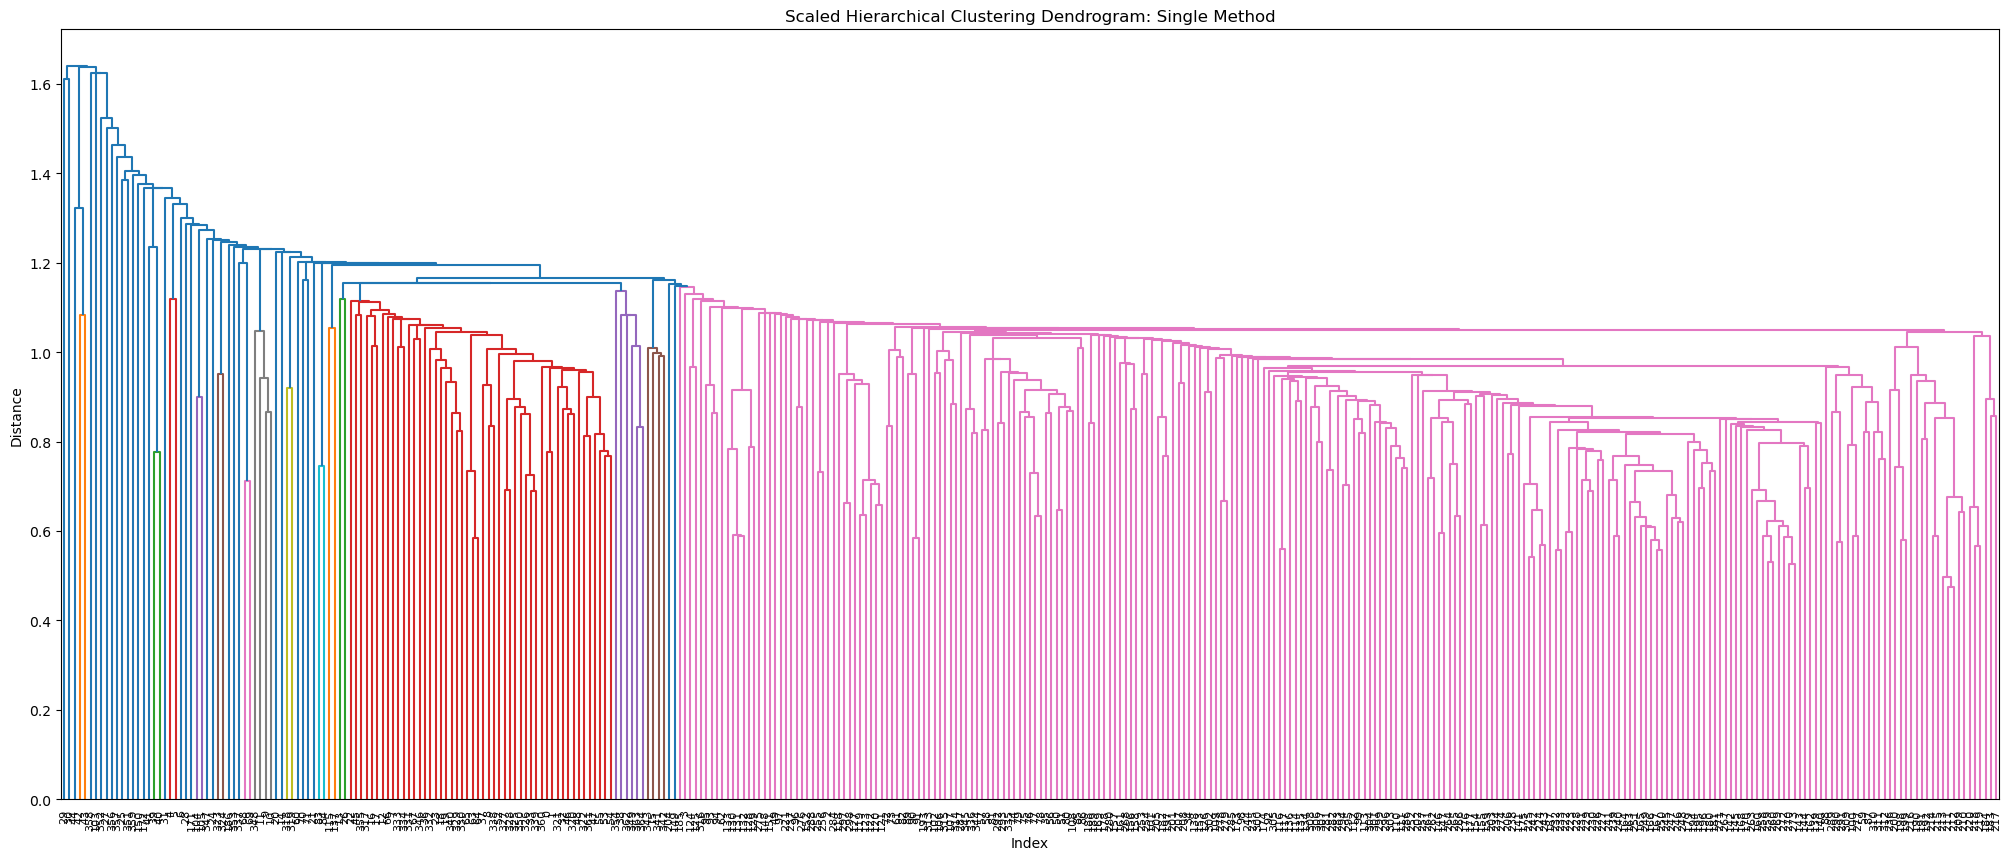

In [66]:
# Calculate dendrogram using single method.

plt.figure(figsize=(25, 10))
plt.title('Scaled Hierarchical Clustering Dendrogram: Single Method')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Three primary clusters found with the single method.

In [52]:
# Generate the linkage matrix for complete method.

Z1 = linkage(df_temps99_scaled, 'complete')

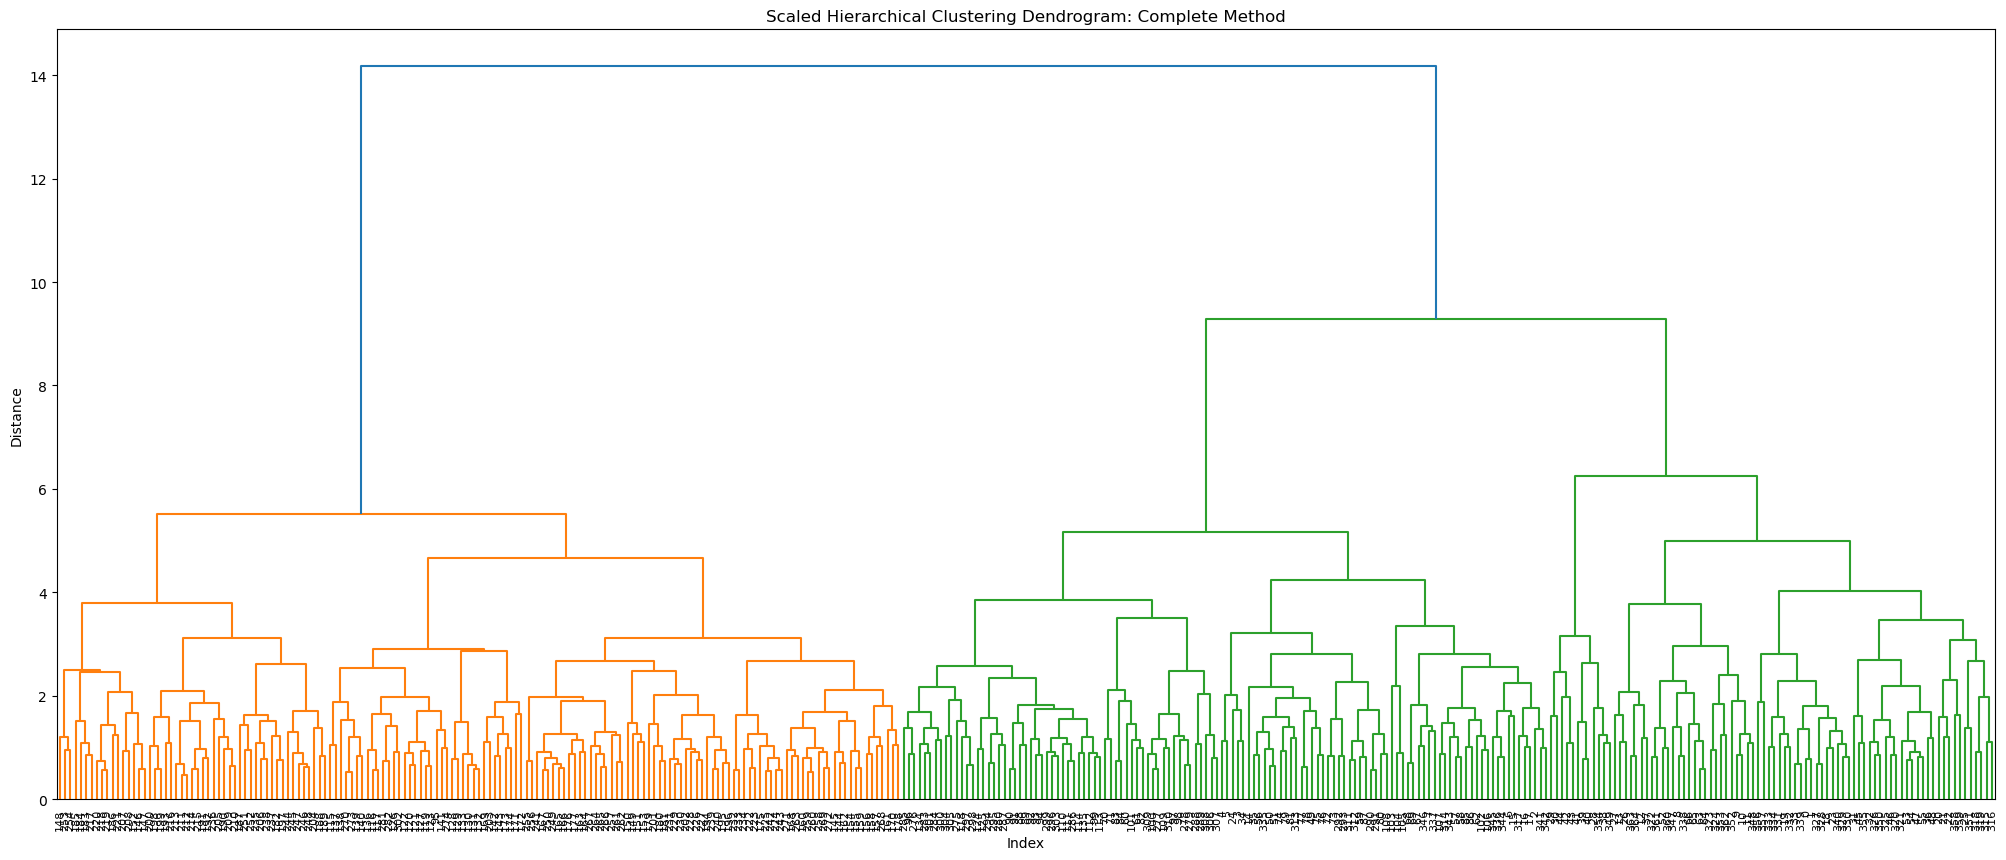

In [67]:
# Calculate dendrogram using complete method.

plt.figure(figsize=(25, 10))
plt.title('Scaled Hierarchical Clustering Dendrogram: Complete Method')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z1,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Two clusters found with complete method.

In [57]:
# Generate the linkage matrix for average method.

Z2 = linkage(df_temps99_scaled, 'average')

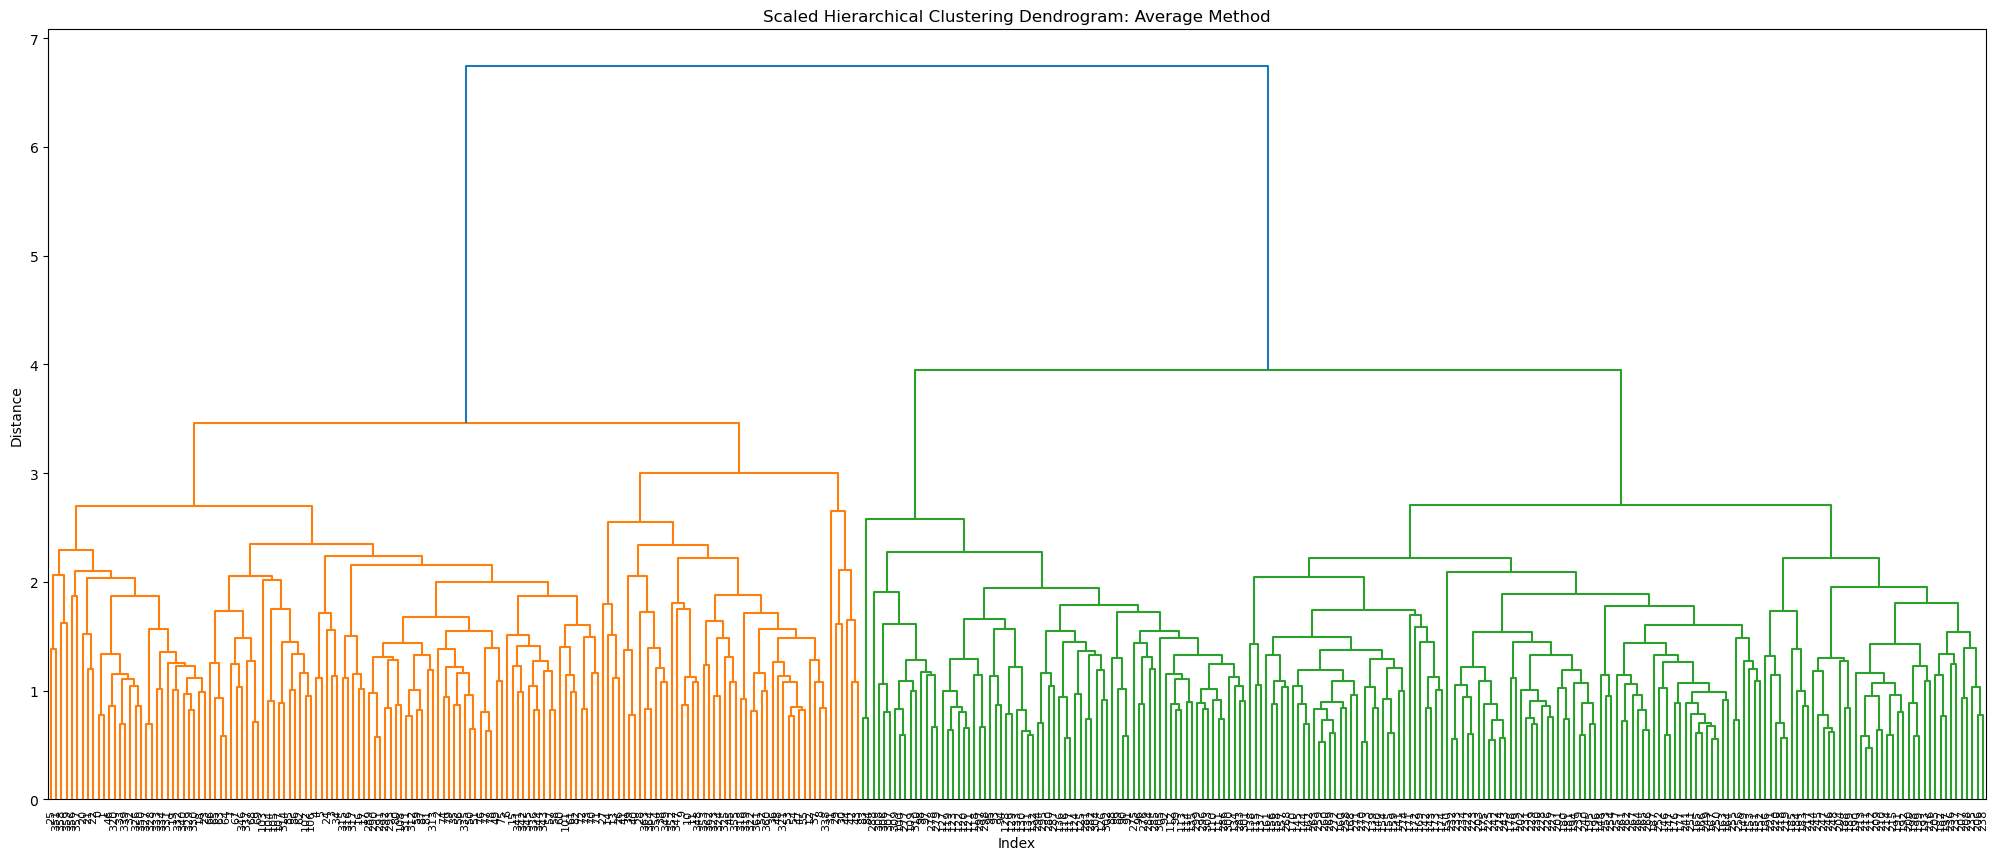

In [68]:
# Calculate dendrogram using average method.

plt.figure(figsize=(25, 10))
plt.title('Scaled Hierarchical Clustering Dendrogram: Average Method')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z2,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Two clusters found with average method.

In [61]:
# Generate the linkage matrix for ward method.

Z3 = linkage(df_temps99_scaled, 'ward')

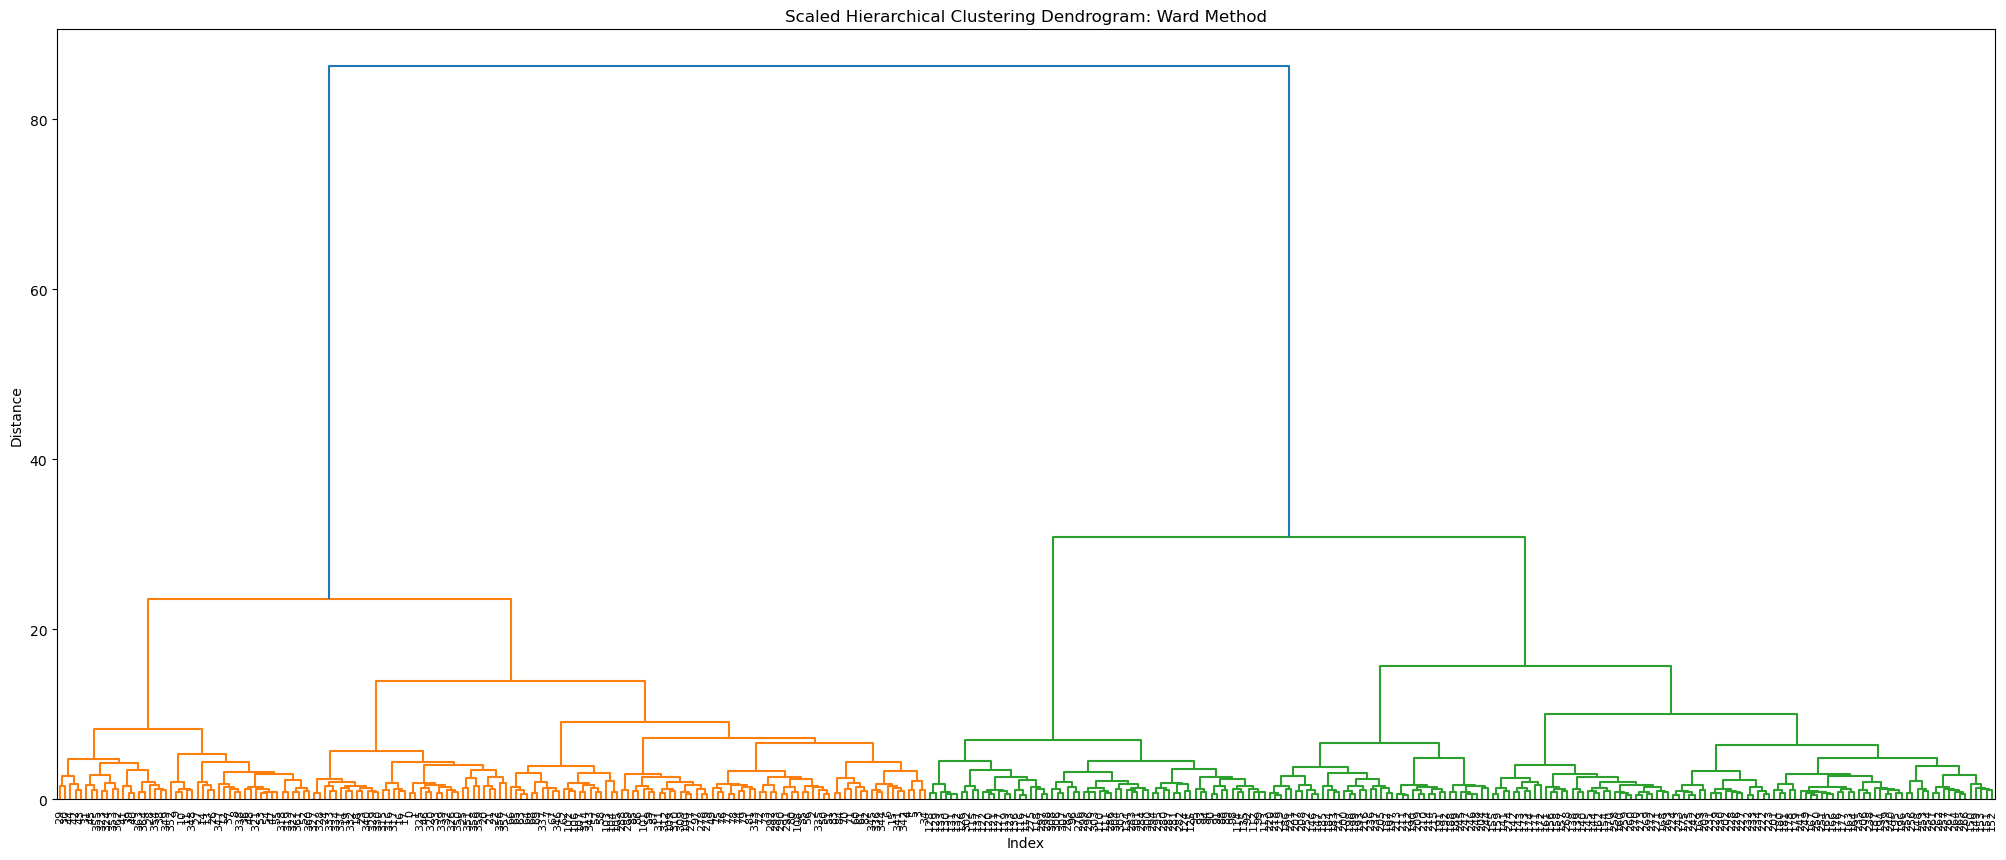

In [69]:
# Calculate dendrogram using ward method.

plt.figure(figsize=(25, 10))
plt.title('Scaled Hierarchical Clustering Dendrogram: Ward Method')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z3,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Two clusters found with ward method.

### 4. Run dendograms for unscaled weather data using each of the four methods: single, complete, average, and ward.

In [64]:
# Remove 'DATE' column from unscaled 1999 mean temperatures data set.

df_temps99_unscaled = df_temps_99.drop('DATE', axis=1)
df_temps99_unscaled

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
14245,0.3,0.1,-3.1,5.8,5.6,9.2,0.6,0.1,7.8,5.0,-0.4,0.3,-10.0,0.5,7.9
14246,2.8,3.8,-1.2,6.4,6.2,8.3,2.4,1.1,7.2,3.6,1.1,0.5,-8.7,1.1,7.9
14247,7.8,3.6,2.9,5.6,5.9,8.8,4.4,2.5,6.0,4.4,7.0,2.3,-9.4,2.3,9.1
14248,9.2,1.4,3.9,10.1,10.5,9.9,8.1,2.4,10.6,3.8,8.8,1.8,-7.8,2.1,10.0
14249,9.7,4.5,2.3,11.5,12.2,12.4,10.4,0.5,12.5,8.0,7.4,0.4,-2.8,2.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,5.0,4.1,4.0,3.8,3.1,3.2,1.5,2.8,3.2,11.4,2.2,0.7,-14.3,1.0,4.8
14606,2.4,4.7,0.6,1.5,2.6,3.4,1.5,0.9,2.3,7.6,-0.1,-0.8,-14.9,-0.4,5.3
14607,1.8,2.0,1.6,3.2,2.8,2.0,2.1,-2.0,2.3,3.4,-0.4,-3.5,-18.2,-2.1,7.1
14608,1.1,0.3,1.8,2.9,3.4,3.4,1.2,-3.5,2.5,3.3,-0.6,-9.4,-18.8,-6.6,8.4


In [65]:
# Generate the linkage matrix for single method.

Z4 = linkage(df_temps99_unscaled, 'single')

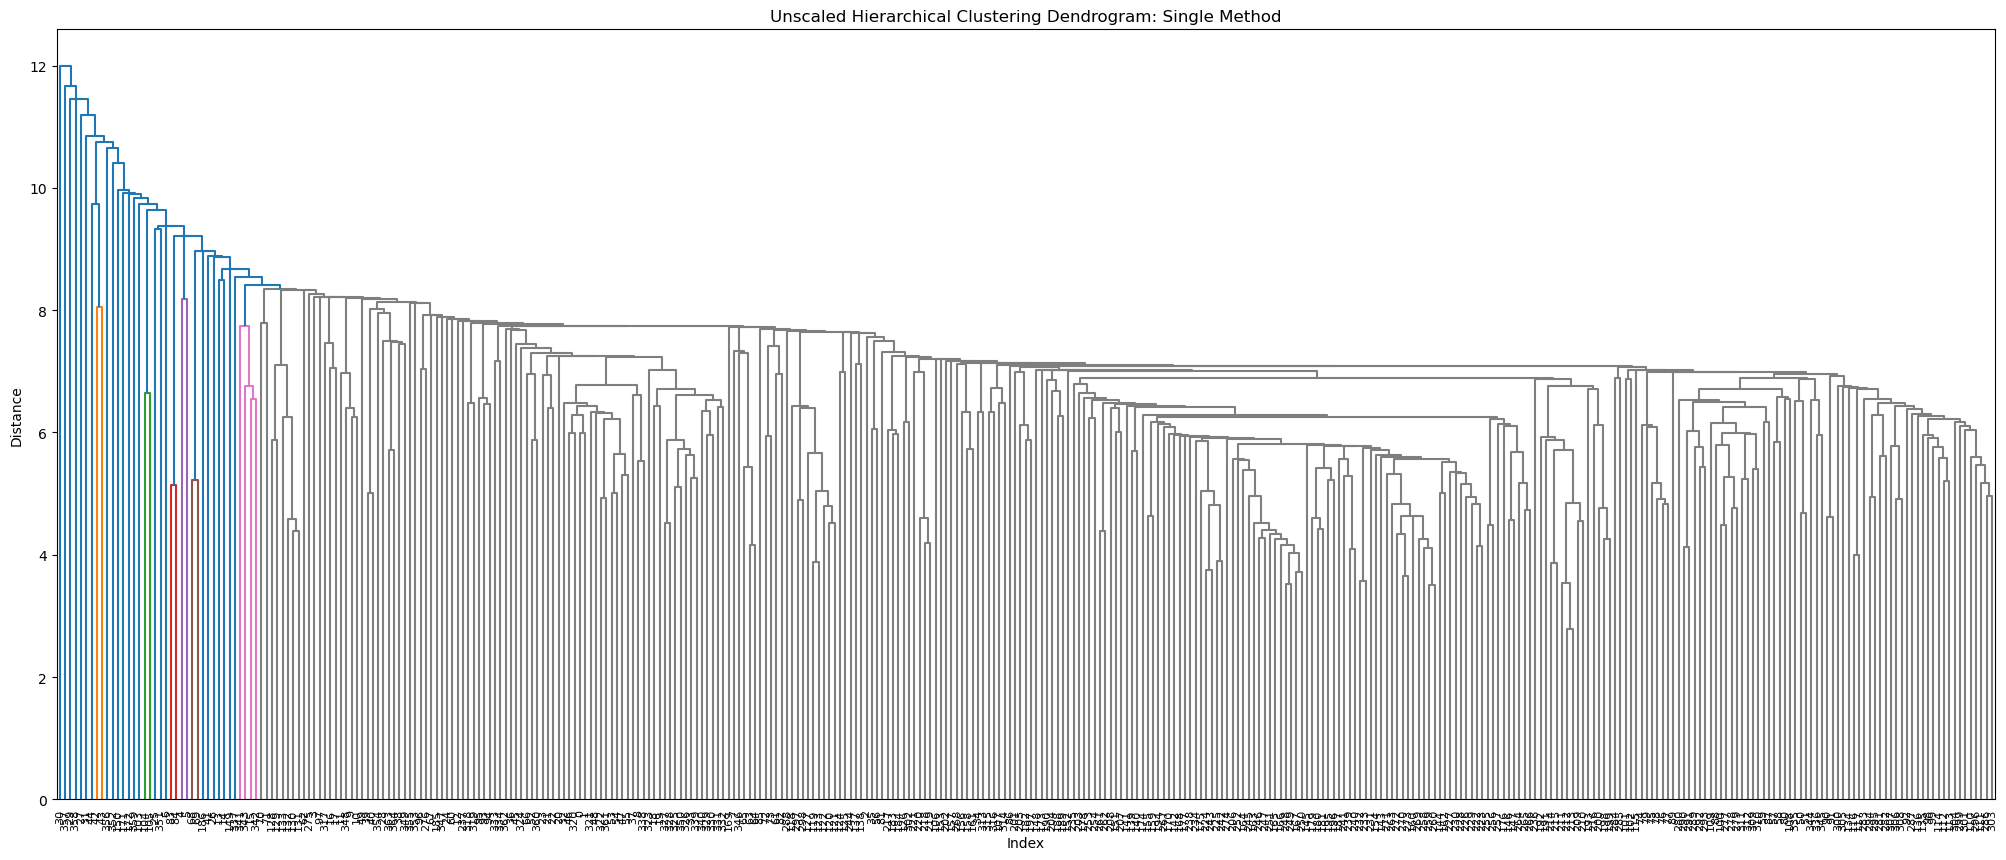

In [70]:
# Calculate dendrogram using single method.

plt.figure(figsize=(25, 10))
plt.title('Unscaled Hierarchical Clustering Dendrogram: Single Method')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z4,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [71]:
# Generate the linkage matrix for complete method.

Z5 = linkage(df_temps99_unscaled, 'complete')

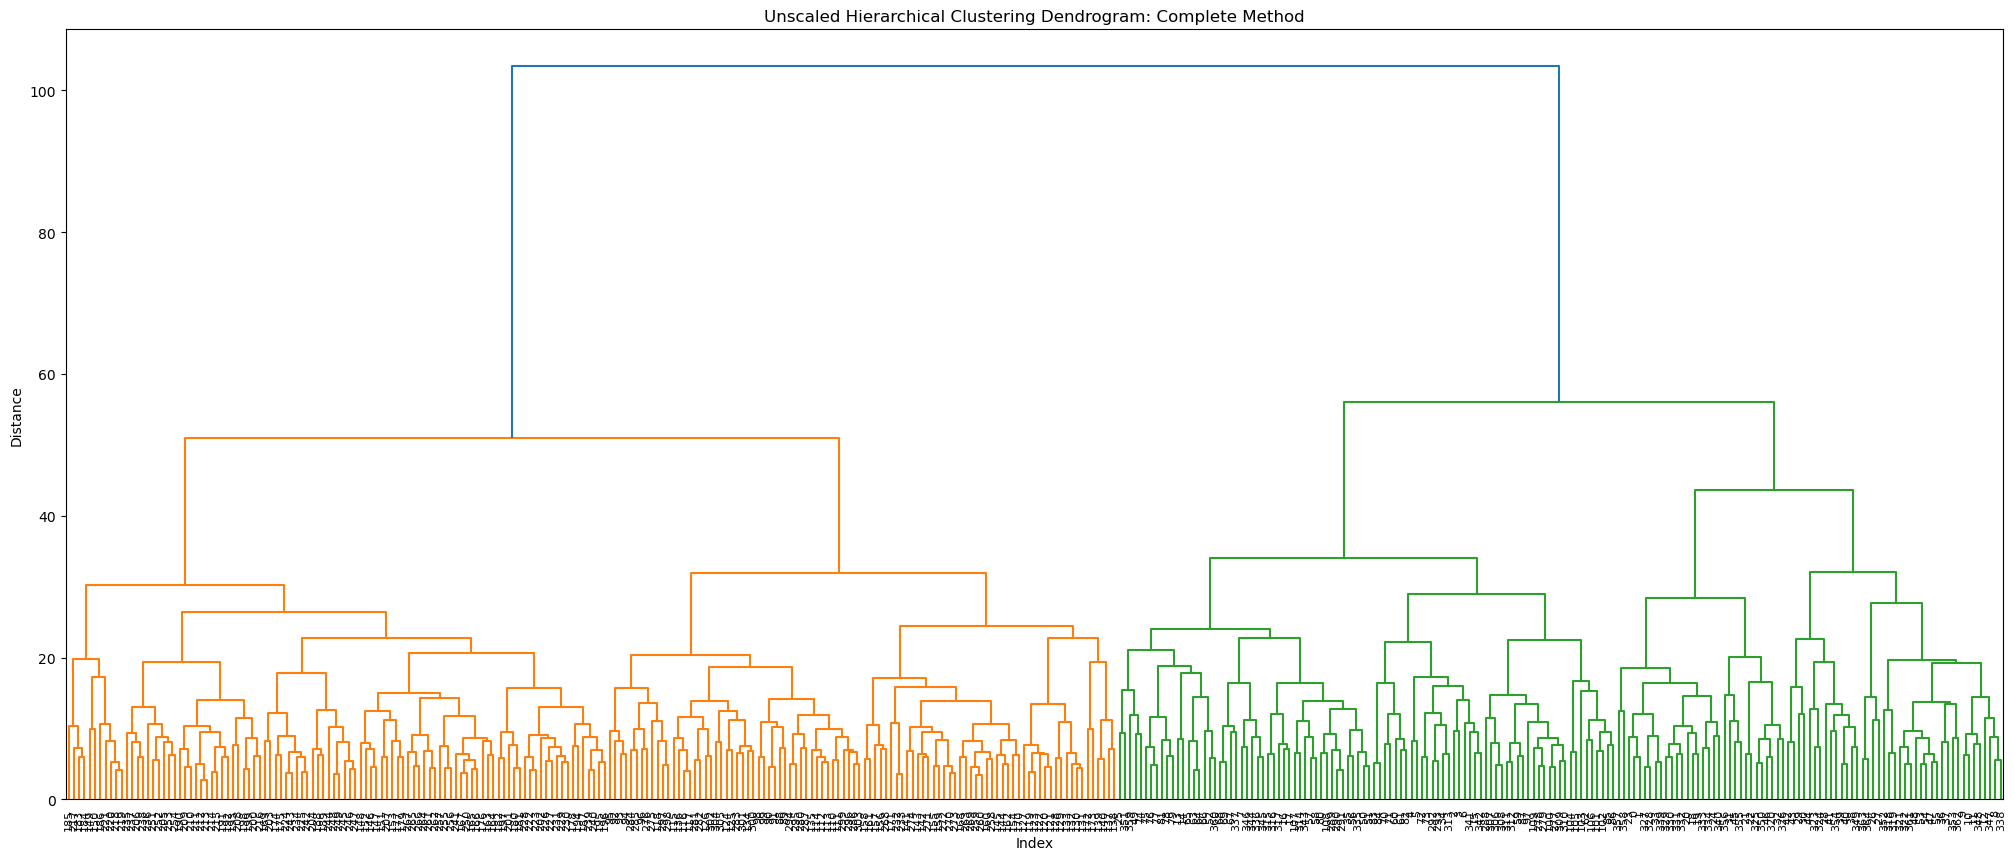

In [72]:
# Calculate dendrogram using complete method.

plt.figure(figsize=(25, 10))
plt.title('Unscaled Hierarchical Clustering Dendrogram: Complete Method')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z5,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [73]:
# Generate the linkage matrix for average method.

Z6 = linkage(df_temps99_unscaled, 'average')

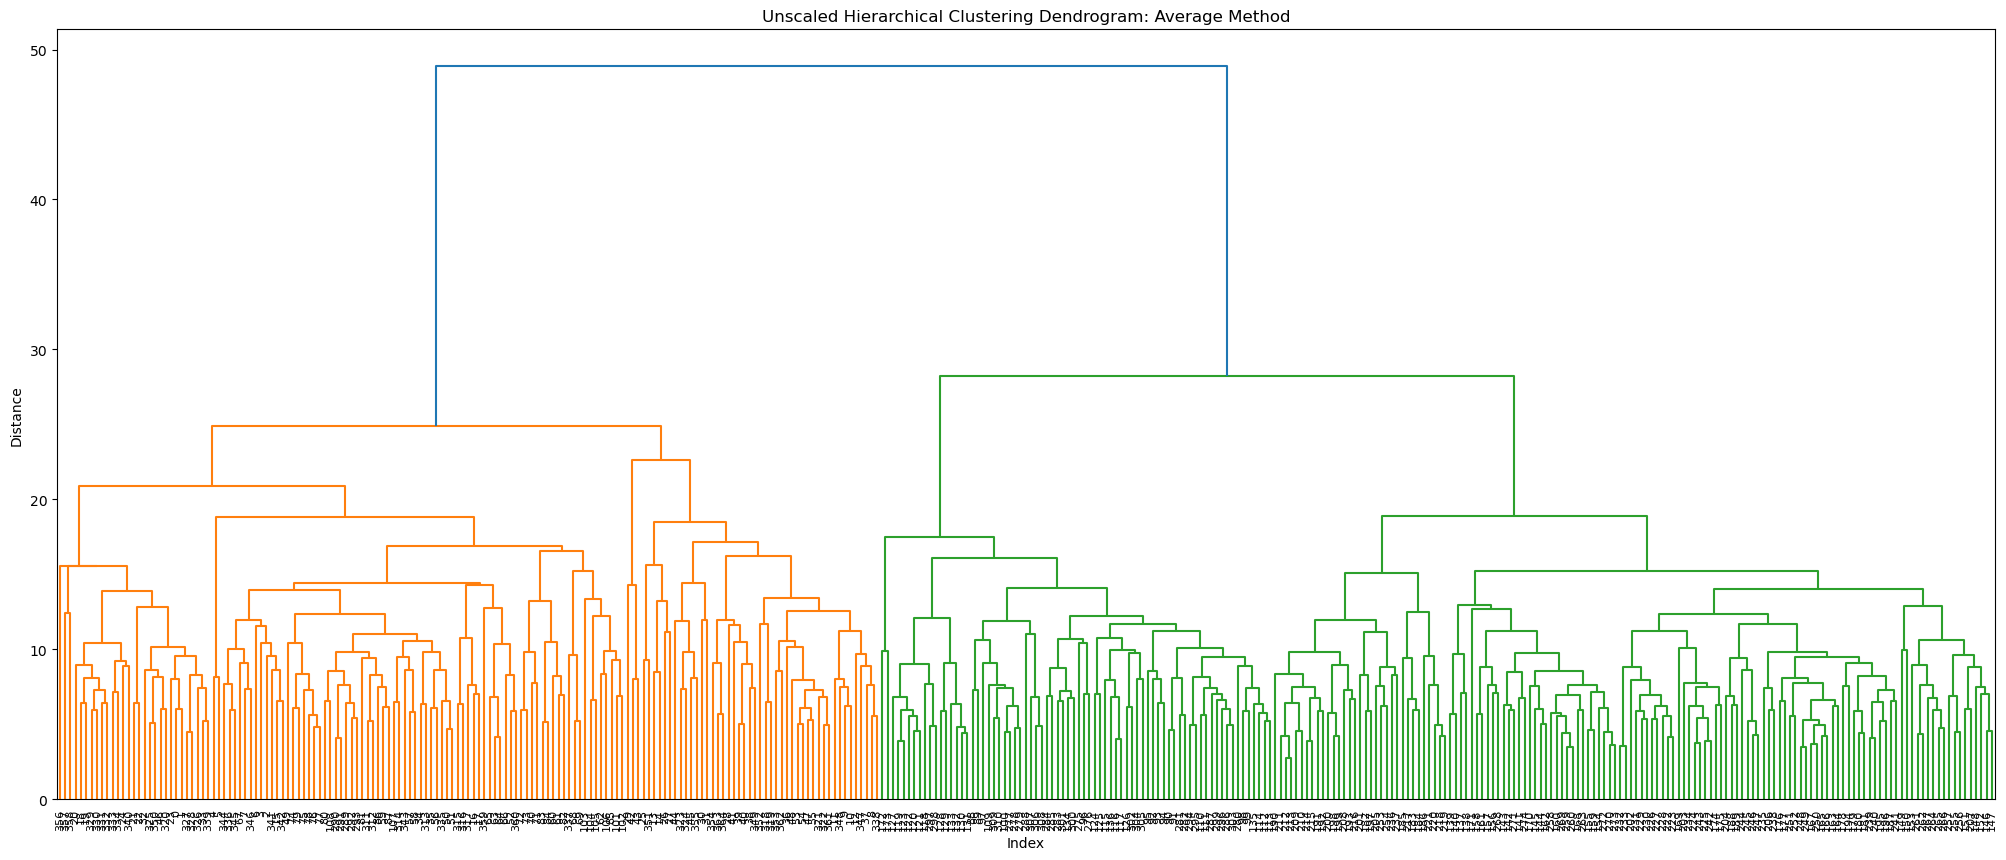

In [74]:
# Calculate dendrogram using average method.

plt.figure(figsize=(25, 10))
plt.title('Unscaled Hierarchical Clustering Dendrogram: Average Method')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z6,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [75]:
# Generate the linkage matrix for ward method.

Z7 = linkage(df_temps99_unscaled, 'ward')

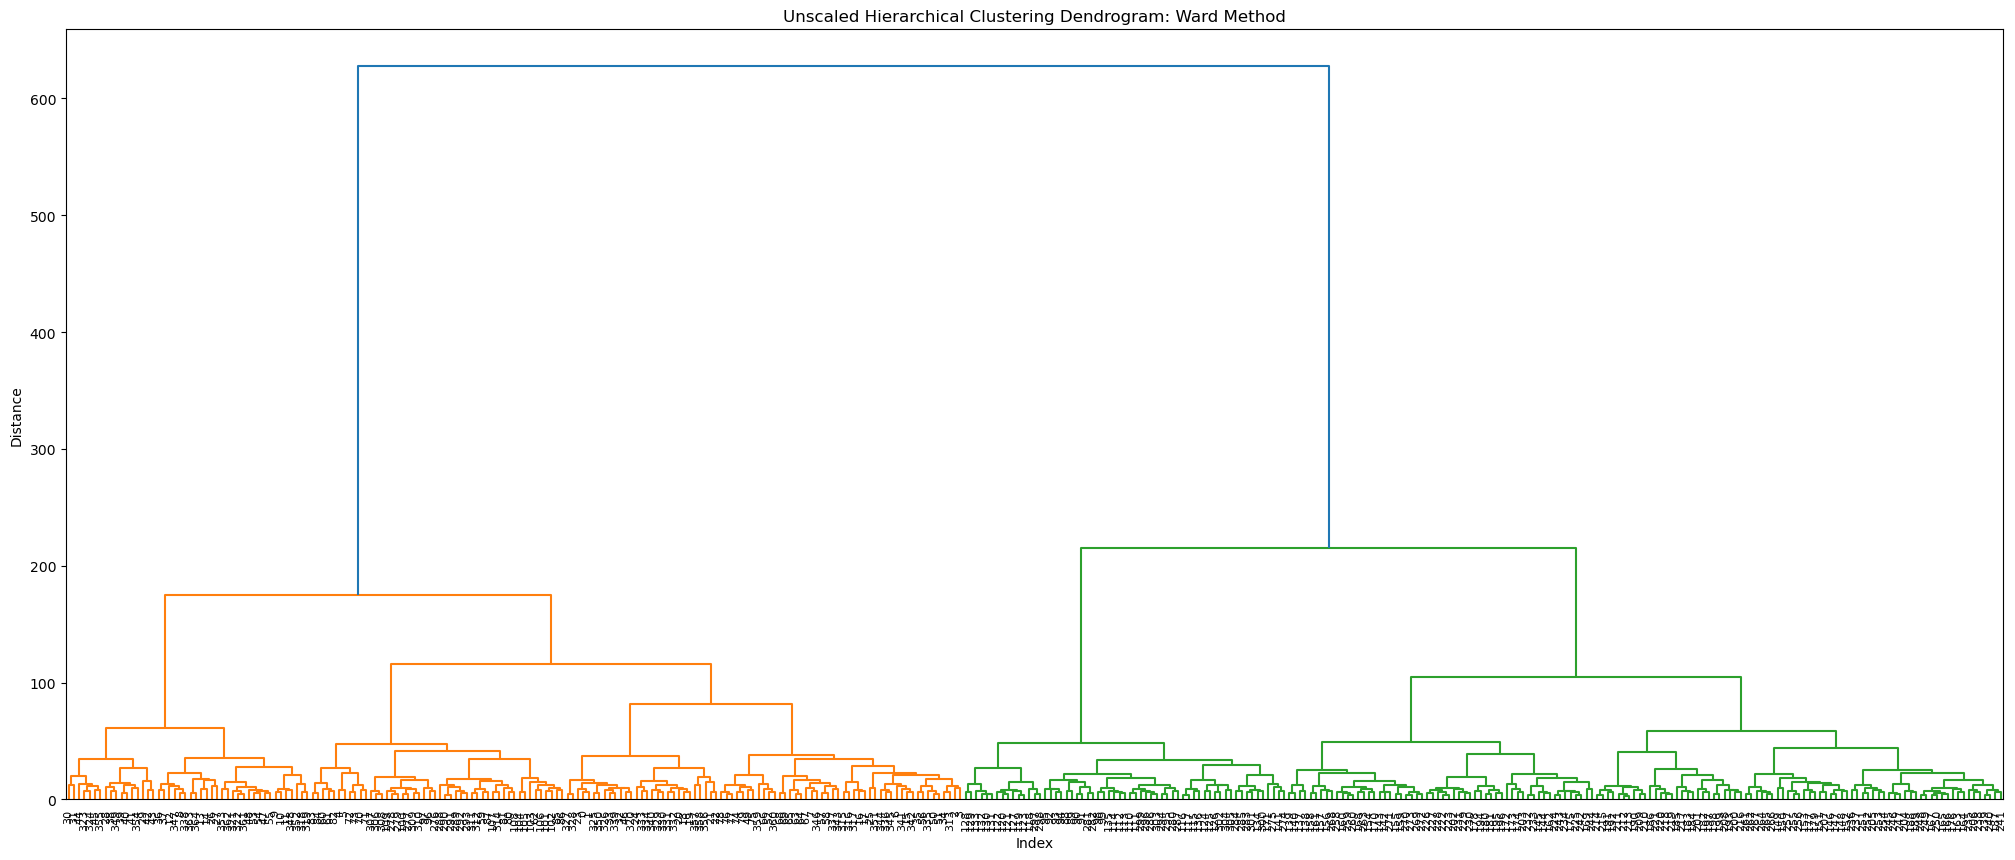

In [76]:
# Calculate dendrogram using ward method.

plt.figure(figsize=(25, 10))
plt.title('Unscaled Hierarchical Clustering Dendrogram: Ward Method')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z7,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()